In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(5)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [ ]:
# Importing necessary libraries
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
y = df['author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
EAP


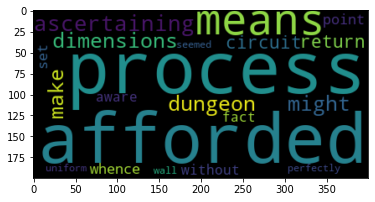

It never once occurred to me that the fumbling might be a mere mistake.
HPL


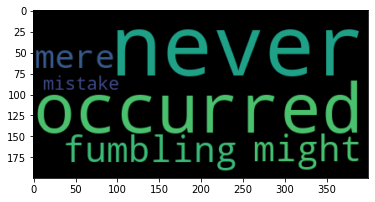

How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.
MWS


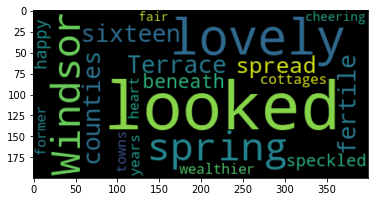

In [ ]:
# Importing necessary libraries
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = df['text']
wordcloud1 = WordCloud().generate(X[0]) # for EAP
wordcloud2 = WordCloud().generate(X[1]) # for HPL
wordcloud3 = WordCloud().generate(X[3]) # for MWS 
print(X[0])
print(df['author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X[1])
print(df['author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(X[3])
print(df['author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

In [ ]:
# Importing necessary libraries
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1234)


bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)

text_bow_train=bow_transformer.transform(X_train)

text_bow_test=bow_transformer.transform(X_test)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB
# instantiating the model with Multinomial Naive Bayes..
model = MultinomialNB()
# training the model...
model = model.fit(text_bow_train, y_train)

In [ ]:
model.score(text_bow_train, y_train)

0.9074889867841409

In [ ]:
model.score(text_bow_test, y_test)

0.8414198161389173

In [ ]:
# Importing necessary libraries
from sklearn.metrics import classification_report
 
# getting the predictions of the Validation Set...
predictions = model.predict(text_bow_test)
# getting the Precision, Recall, F1-Score
print(classification_report(y_test,predictions))